<a href="https://colab.research.google.com/github/jhagihara/Diamond-Price-Prediction/blob/main/DiamondPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports and Loading Dataset**

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the diamond dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets for DSML/M6_T2_V1_Diamonds.csv')

#**Initial Observations**

In [ ]:
# first 5 rows of dataset
data.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [ ]:
# statistical summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80




*   There are 53940 diamonds
*   The mean carat is .8
*   The price ranges from 326-18823 dollars with the average price being 3932.8 dollars





In [ ]:
# dimensions of the data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 53940 rows and 8 columns


In [ ]:
# datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
# checking unique values for categorical columns
cat_cols = ['cut', 'color', 'clarity']
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*10)

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
----------
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
----------
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
----------


#**EDA**

In [ ]:
# function that plots both histogram and box plots
def histogram_box(data, col):
    f, (axis_box, axis_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(10, 5))
    sns.boxplot(data=data, x=col, ax=axis_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=axis_hist)
    plt.title(col)
    plt.show()

In [ ]:
# function that stacks barplots
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

In [ ]:
# defining numerical columns
num_cols = ['carat', 'price', 'x', 'y', 'z']

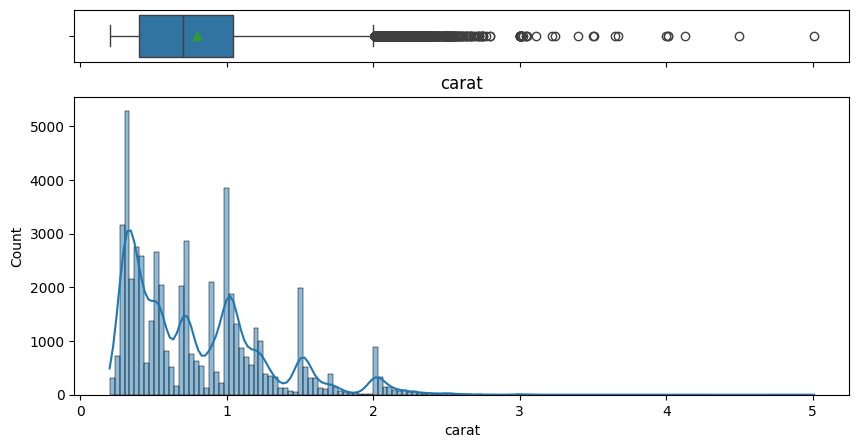

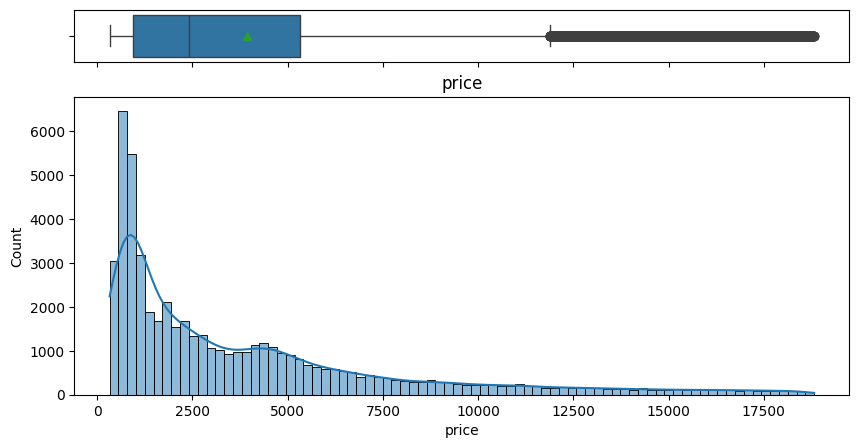

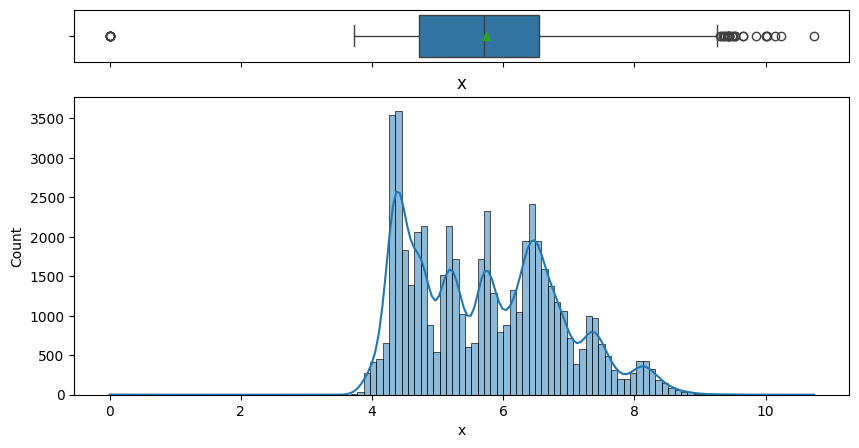

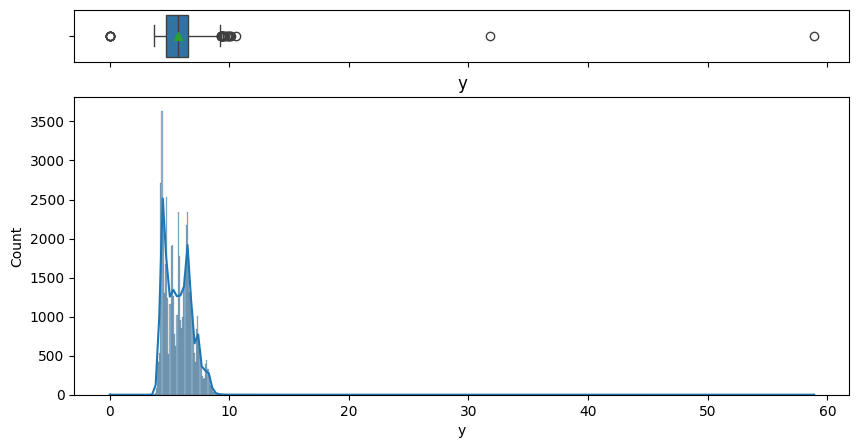

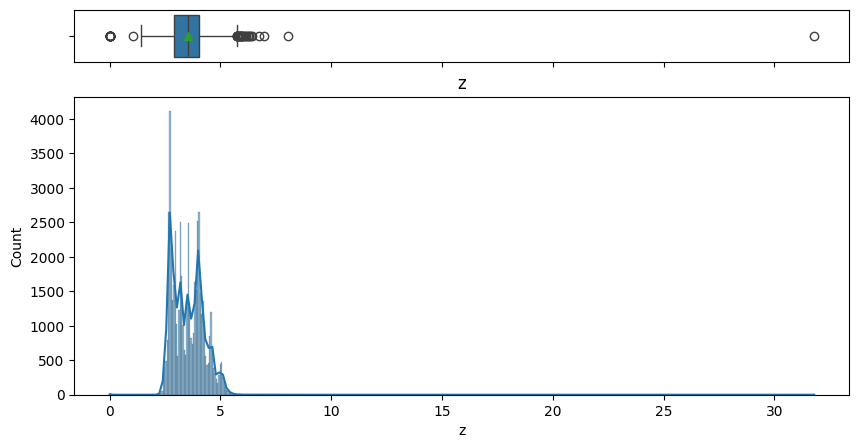

In [ ]:
# histogram boxplot for all numerical columns
for i, j in enumerate(num_cols):
  #plt.subplot(5, 1, i+1)
  histogram_box(data, j)



*   carat seems to be right skewed towards lower carats
*   price also seems to be right skewed towards lower prices



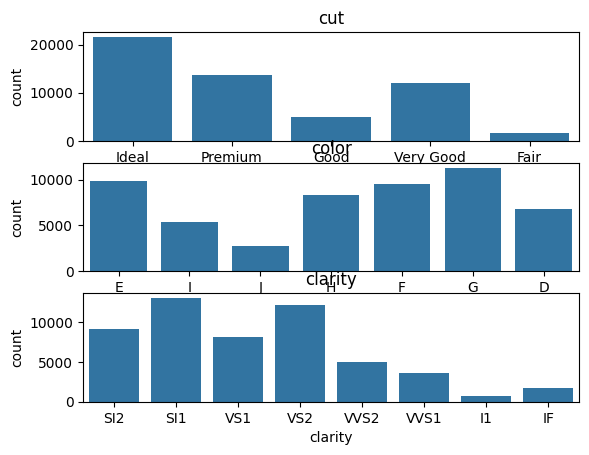

In [ ]:
# histograms for categorical features
for i, j in enumerate(cat_cols):
  plt.subplot(3, 1, i+1)
  plt.subplots_adjust(wspace=1.5)
  sns.countplot(data=data, x=j)
  plt.title(j)




*   ideal cut is the most frequent, followed by premium and very good
*   colors G, E F are the top 3 most frequent
*   clarity SI1, VS2 and SI2 are the top 3 most frequent



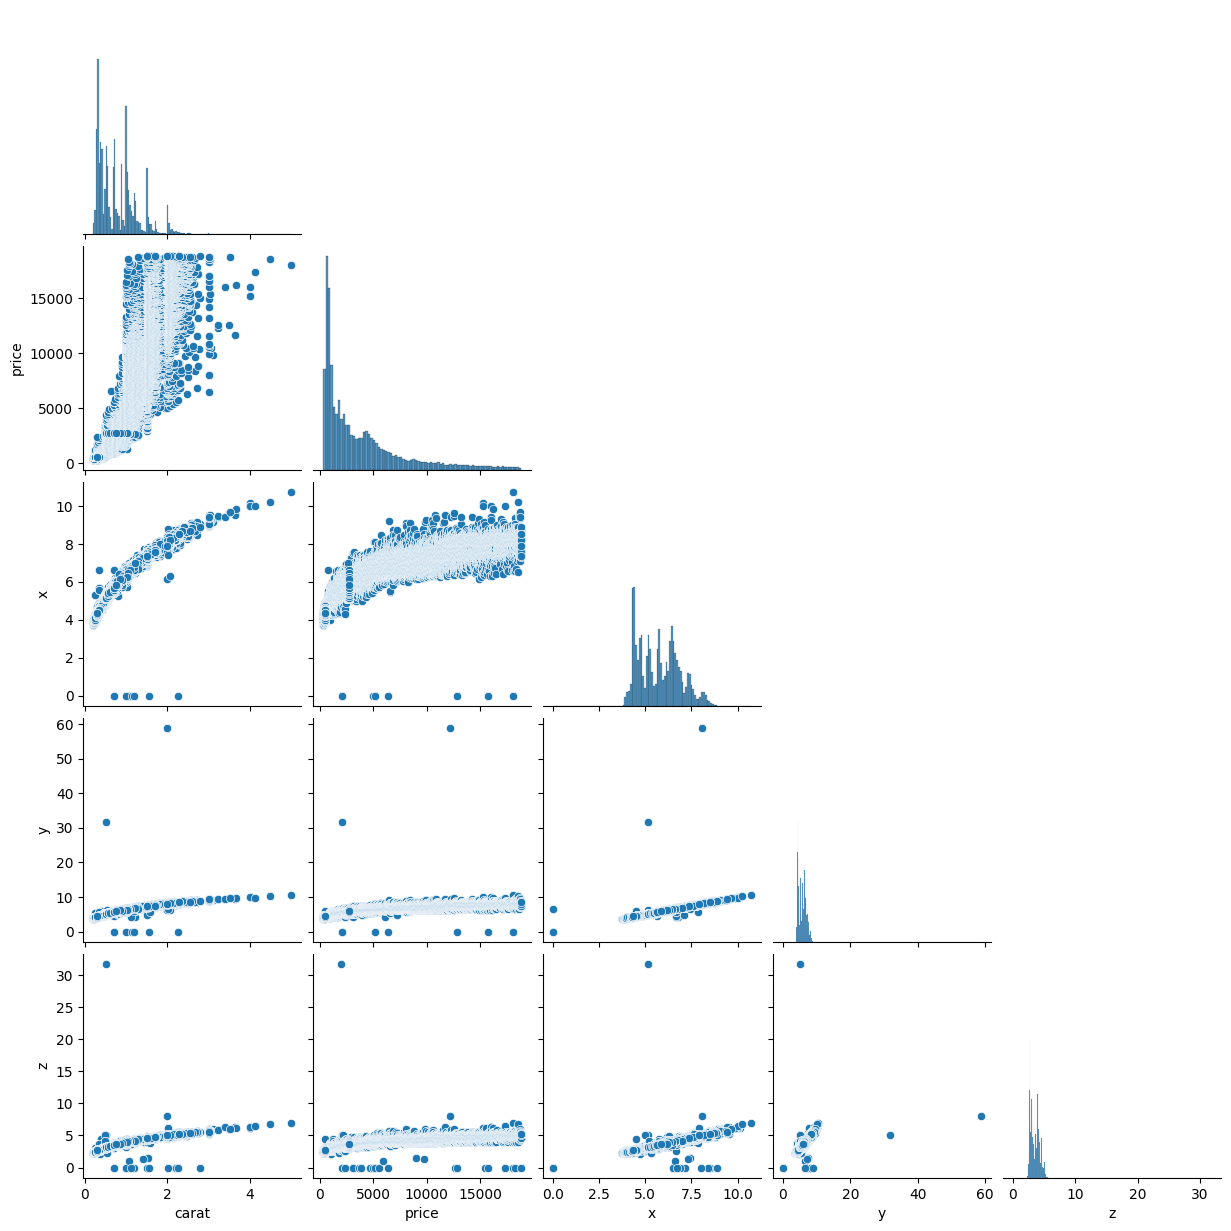

In [ ]:
# pairplot of the numerical columns
sns.pairplot(data[num_cols], corner=True)

<Axes: >

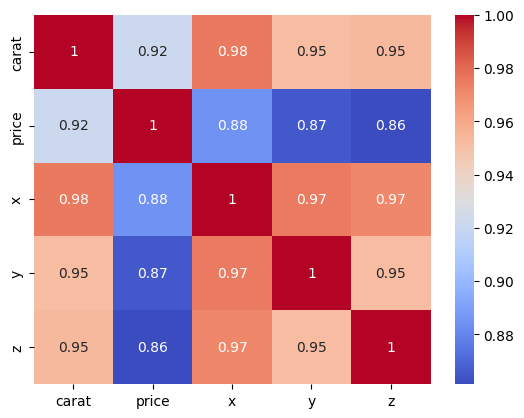

In [ ]:
# heatmap of the correlations
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')



*   It seems that all the numerical features are highly correlated with one another
*   x and carat, x and y, x and z are the highest correlated pairs
*   Price has a .92 correlation with carat, and around .88, .87, and .86 correlation with x, y and z respectively, which is the lowest correlations but still relatively high in general



<Axes: xlabel='carat', ylabel='price'>

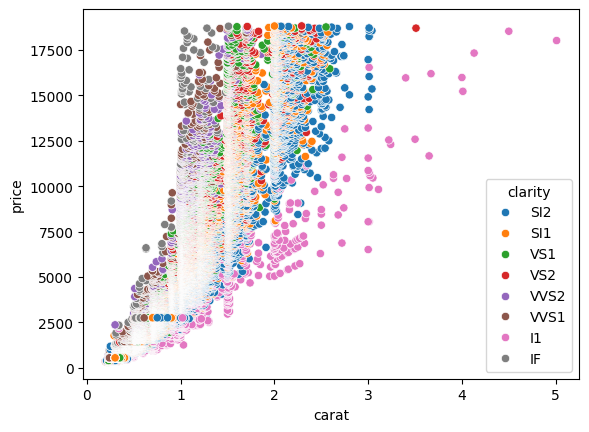

In [ ]:
# carat vs price with clarity hue
sns.scatterplot(data=data, x='carat', y='price', hue='clarity')



*   With respect to the carat vs price graph, it seems there are clusters based on the clarity



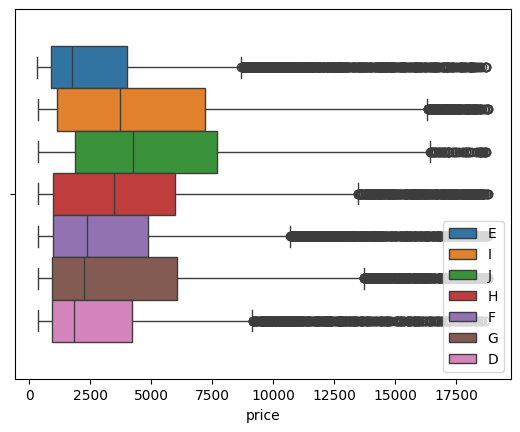

In [ ]:
# price vs color
sns.boxplot(data=data, x='price', hue="color")
plt.legend(loc="lower right")



*   the color J seems to have the highest median price, followed by I and H
*   D, E F and G have the lowest median prices


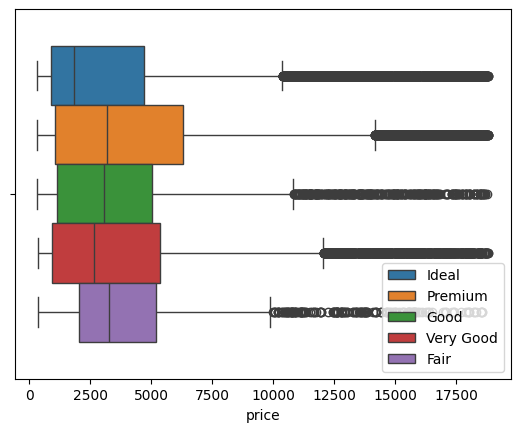

In [ ]:
# price vs cut
sns.boxplot(data=data, x='price', hue="cut")
plt.legend(loc="lower right")



*   ideal cut has the lowest median price alongside very good
*   premium cut has the highest median price



#**Data Preprocessing**

In [ ]:
# checking for dupliactes
data.duplicated().sum()

296

In [ ]:
# checking for null values
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
price,0
x,0
y,0
z,0


In [ ]:
# dropping duplicated rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
# creating dummy variables for the categorical features
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# separating the independent and the dependent variables
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (42915, 21)
Shape of test set:  (10729, 21)


In [ ]:
# scaling the data
scaler = StandardScaler()
# removing price from num_cols
num_cols1 = ['x', 'y', 'z']
X_train[num_cols1] = scaler.fit_transform(X_train[num_cols1])
X_test[num_cols1] = scaler.fit_transform(X_test[num_cols1])
# data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


In [ ]:
# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Creating a dataframe of metrics
    df_performance = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_performance

#**Ordinary Least Squares**

In [ ]:
# adding constants
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)
# convert bool to int
X_train1 = X_train1.astype(int)
X_test1 = X_test1.astype(int)

In [ ]:
# fitting OLS
olsmodel1 = sm.OLS(y_train, X_train1).fit()
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:31:18   Log-Likelihood:            -3.7658e+05
No. Observations:               42915   AIC:                         7.532e+05
Df Residuals:                   42893   BIC:                         7.534e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1232.1103     76.241    -16.161      0.000   -1381.545   -1082.676
carat          4353.1547     19.589    222.227      0.000    4314.760    4391.549
x              1369.0917     36.842     37.162      0.000    1296.881    1441.302
y               257.7920     26.770      9.630      0.000     205.322     310.262
z               951.4290     31.531     30.175      0.000     889.628    1013.230
cut_Good        443.5780     51.248      8.655      0.000     343.131     544.025
cut_Ideal       639.1309     46.746     13.673      0.000     547.509     730.753
cut_Premium     581.5960     47.294     12.297      0.000     488.898     674.294
cut_Very Good   636.4814     47.696     13.345      0.000     542.996     729.967
color_E        -205.1448     27.781     -7.384      0.000    -259.596    -150.694
color_F        -223.1944     28.005     -7.970      0.000    -278.084    -168.305
color_G        -375.1670     27.425    -13.680      0.000    -428.920    -321.414
color_H        -705.8565     29.167    -24.201      0.000    -763.024    -648.689
color_I       -1054.1561     32.760    -32.178      0.000   -1118.366    -989.946
color_J       -1957.2774     40.327    -48.535      0.000   -2036.319   -1878.236
clarity_IF     4540.1639     79.038     57.443      0.000    4385.247    4695.081
clarity_SI1    3129.9359     67.276     46.524      0.000    2998.073    3261.798
clarity_SI2    2339.9223     67.600     34.614      0.000    2207.425    2472.419
clarity_VS1    3892.4058     68.634     56.712      0.000    3757.881    4026.930
clarity_VS2    3672.0707     67.637     54.291      0.000    3539.500    3804.641
clarity_VVS1   4143.5088     72.584     57.086      0.000    4001.242    4285.775
clarity_VVS2   4087.6277     70.646     57.861      0.000    3949.161    4226.095
==============================================================================
Omnibus:                    11841.521   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74288.776
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       8.999   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# metric performance for ols
model_performance_regression(olsmodel1, X_train1, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1565.648481,1162.938046,0.845524,0.845444,58.961498


#**Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()